In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

from scipy.stats import entropy


# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

# def change_weights(X_train,y_train,X_test,y_test,weights):

In [ ]:
# Check if the entropy functions work

In [ ]:
pk = np.array([1/5, 2/5, 2/5])  # fair coin
H = entropy(pk)
print(H)

1.0549201679861442


In [ ]:
H=-0.2*(np.log(0.2))-0.4*(np.log(0.4))-0.4*(np.log(0.4))
print(H)

1.0549201679861442


In [ ]:

def calculate_probabilities(list_labels, uniq_labels):
    '''
    Author: Sara Nassar 
    this function calculates the probabilities of each label in the list of labels
    it is calculated by number of labels in class A/all labels
    number of labels in class B/all labels
    and so on
    '''
    
    # A dictionary to store the probabilities
    probabilities = dict.fromkeys(uniq_labels, 0)
    
    # Total number of labels
    total_labels = len(list_labels)
    
    for label in uniq_labels:
        # Counting the number of times the label occurs in the list
        count = list_labels.count(label)
        
        # Calculating the probability of the label
        probability = count / total_labels
        
        # Storing the calculated probability in the dictionary
        probabilities[label] = probability
        
    return probabilities    
    
    
# test your function
list_labels=[1,2,0,1,2,0]
uniq_labels=[0,1,2]
print(calculate_probabilities(list_labels,uniq_labels))
# this should print somehting like 0.33,0.33,0.33


{0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.3333333333333333}


In [ ]:

def calc_entropy_from_probabilities(list_probas):
    '''
    Author: Sara Nassar 
    list_probas is the list of probabiities
    the formula for entropy is
    sum(-proba*log(proba))
    
    '''
    
    entropy_value = 0

    for proba in list_probas:
        # If the probability is not zero
        if proba != 0:
            entropy_value += -proba * np.log(proba)
     
    return entropy_value


# test your function
list_probas=[1/5, 2/5, 2/5]
print(calc_entropy_from_probabilities(list_probas))
# above should print 1.054...

1.0549201679861442


In [ ]:
def information_gain(old_entropy,new_entropies,count_items):
    '''
    Author: Sara Nassar 
    from the list of new entropies, calculate the overall new entropy
    
    formula is something like:
    overall_new_entropy = entropy1*proportion1 + entropy2*proportion2+ entropy3*proportion3 ...
    
    igain=old_entropy-overall_new_entropy
    '''
    
    overall_new_entropy = 0
    
    # Calculating the total number of items
    total_items = sum(count_items)
    
    for i in range(len(new_entropies)):
        # Calculating the proportion of items in the current partition
        proportion = count_items[i] / total_items
        
        # Adding the entropy of the current partition weighted by its proportion to the overall new entropy
        overall_new_entropy += new_entropies[i] * proportion
        
    # Calculating the information gain
    information_gain = old_entropy - overall_new_entropy
    
    return information_gain

#test your function
old_entropy=1
new_entropies=[0,0.65]
count_items=[4,6]
print(information_gain(old_entropy,new_entropies,count_items))
# above should print 0.61
    
    
    

0.61


In [ ]:
# X

In [ ]:
# iris

In [ ]:
num_feats=X_train.shape[1]
def initialize_weights(number_features):
    '''
    the first set of weights corresponding to the features
    For now, it defaults to 2
    '''
    
    weights=np.array([2 for i in range(number_features)])
    return weights
    

In [ ]:
print(initialize_weights(num_feats))

[2 2 2 2]


In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

### Task 2: Perform one iteration of Information gain calculation

In [ ]:
# initialization
# Author: Bilal 

# step 1 calculate the probabilities of 0, 1 and 2 in the y_test array
proba_init = calculate_probabilities(y_test.tolist(),np.unique(y_test).tolist())
print("Initial proba=",proba_init)

# step 2 calculate the initial entropy of y_test, using the probability values
# you might have to convert the dictionary to a list
# get only the probability values
list_probas=list(proba_init.values())
print(list_probas)
entropy_init=calc_entropy_from_probabilities(list_probas)
print("Initial entropy = ",entropy_init)

Initial proba= {0: 0.38, 1: 0.3, 2: 0.32}
[0.38, 0.3, 0.32]
Initial entropy =  1.0934927418975058


In [ ]:
# Author: Bilal

wt_init=initialize_weights(num_feats)
# right now the initialize_weights function only returns 2,2,2 
print(wt_init)

# multiply the weights with each feature and calculate the sum
res=np.sum(X_test * wt_init, axis=1)
print(res)


[2 2 2 2]
[29.6 23.  39.  29.8 31.6 21.4 26.8 34.8 28.8 27.2 33.6 18.6 21.  19.2
 21.4 31.8 35.  26.2 28.6 34.  19.4 31.6 20.8 33.8 40.2 34.4 33.6 36.4
 19.  19.4 18.8 24.  31.2 20.  18.2 31.4 31.2 20.8 20.4 21.8 31.  31.
 32.  22.  21.6 25.2 31.4 33.6 30.8 38.8]


In [ ]:
res.min()

18.2

In [ ]:
# Author: Bilal

# choose a threshold between minimum and maximum
threshold=np.random.uniform(res.min(), res.max())
print(threshold)


# make two groups
group1=[]
group2=[]

for i in range(res.shape[0]):
    if res[i]<threshold:
        group1.append(y_test[i])
    else:
        group2.append(y_test[i])
   

31.34890465680489


In [ ]:
# Author: Bilal
proba_gr1=calculate_probabilities(group1,np.unique(group1).tolist())
proba_gr1=list(proba_gr1.values()) 
entropy_group1=calc_entropy_from_probabilities(proba_gr1)
count_group1=len(proba_gr1)

proba_gr2=calculate_probabilities(group2,np.unique(group2).tolist())
proba_gr2=list(proba_gr2.values()) 
entropy_group2=calc_entropy_from_probabilities(proba_gr2)
count_group2=len(proba_gr2)

new_entropies=[entropy_group1,entropy_group2]
count_items=[count_group1,count_group2]
ig=information_gain(entropy_init,new_entropies,count_items)
print("IG=",ig)

IG= 0.4418870992014925


### End of task 2

### Task 3


In [ ]:
def objective_function(threshold):
    # Author Bilal
    # make two groups
    group1=[]
    group2=[]

    for i in range(res.shape[0]):
        if res[i]<threshold:
            group1.append(y_test[i])
        else:
            group2.append(y_test[i])

    proba_gr1=calculate_probabilities(group1,np.unique(group1).tolist())
    proba_gr1=list(proba_gr1.values()) 
    entropy_group1=calc_entropy_from_probabilities(proba_gr1)
    count_group1=len(proba_gr1)

    proba_gr2=calculate_probabilities(group2,np.unique(group2).tolist())
    proba_gr2=list(proba_gr2.values()) 
    entropy_group2=calc_entropy_from_probabilities(proba_gr2)
    count_group2=len(proba_gr2)

    new_entropies=[entropy_group1,entropy_group2]
    count_items=[count_group1,count_group2]
    ig=information_gain(entropy_init,new_entropies,count_items)
    print("IG=",ig)
    return ig

IG= 0.5923532297607441
IG= 0.3806374194416984
IG= 0.2744108852108931
IG= 0.2717019705773003
IG= 0.2789049438228687
IG= 0.2787944669912604
IG= 0.4823943698066634
IG= 0.48398953580761916
IG= 0.5245237718772715
IG= 0.2789049438228687
IG= 0.2717019705773003
IG= 0.6317415426142825
IG= 0.2717019705773003
IG= 0.48654563837577736
IG= 0.3239197527976172
IG= 0.3439652491916765
IG= 0.4859604844626245
IG= 0.3439652491916765
IG= 0.3806374194416984
IG= 0.2826199567831551
IG= 0.3239197527976172
IG= 0.6317415426142825
IG= 0.3806374194416984
IG= 0.35627582342681663
IG= 0.2826199567831551
IG= 0.4418870992014925
IG= 0.5528851326446278
IG= 0.2840702193505573
IG= 0.4340317738314988
IG= 0.48398953580761916

 Iteration =  0
Optimal solution: [24.989507589315128]
Objective function value: 0.6317415426142825
IG= 0.6487734655676605
IG= 0.4418870992014925
IG= 0.2826199567831551
IG= 0.2787944669912604
IG= 0.3806374194416984
IG= 0.3114256934663384
IG= 0.48398953580761916
IG= 0.5245237718772715
IG= 0.64877346556766

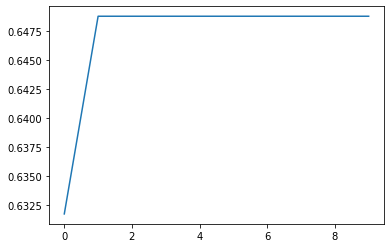

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Author Bilal
#------------------------------------------------------------------------------
# TO CUSTOMIZE THIS PSO CODE TO SOLVE UNCONSTRAINED OPTIMIZATION PROBLEMS, CHANGE THE PARAMETERS IN THIS SECTION ONLY:
# THE FOLLOWING PARAMETERS MUST BE CHANGED.

nv = 1                           # number of variables
mm = 1                           # if minimization problem, mm = -1; if maximization problem, mm = 1
  
# THE FOLLOWING PARAMETERS ARE OPTINAL.
particle_size=50         # number of particles
iterations=50           # max number of iterations
w=0.85                    # inertia constant
c1=1                    # cognative constant
c2=0.5                     # social constant
# END OF THE CUSTOMIZATION SECTION
#------------------------------------------------------------------------------    

class Particle:
    def __init__(self,bounds):
        self.particle_position=[]                     # particle position
        self.particle_velocity=[]                     # particle velocity
        self.local_best_particle_position=[]          # best position of the particle
        self.fitness_local_best_particle_position= initial_fitness
        self.fitness_particle_position=initial_fitness

        for i in range(nv):
          self.particle_position.append(random.uniform(bounds [i][0],bounds [i][1])) 
          self.particle_velocity.append(random.uniform(-1,1))

    def evaluate(self,objective_function):
        self.fitness_particle_position=objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position                  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best

        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position                  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position

    def update_velocity(self,global_best_particle_position):
        for i in range(nv):
            r1=random.random()
            r2=random.random()
  
            cognitive_velocity = c1*r1*(self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2*r2*(global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w*self.particle_velocity[i]+ cognitive_velocity + social_velocity
  
    def update_position(self,bounds):
        for i in range(nv):
            self.particle_position[i]=self.particle_position[i]+self.particle_velocity[i]
  
            # check and repair to satisfy the upper bounds
            if self.particle_position[i]>bounds[i][1]:
                self.particle_position[i]=bounds[i][1]

            if self.particle_position[i] < bounds[i][0]:
            	self.particle_position[i]=bounds[i][0]              
class PSO():
    def __init__(self,objective_function,bounds,particle_size,iterations):
  
        fitness_global_best_particle_position=initial_fitness
        global_best_particle_position=[]
  
        swarm_particle=[]
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A=[]
          
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
                if mm == -1:
                  if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                    global_best_particle_position = list(swarm_particle[j].particle_position)
                    fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
                if mm == 1:
                  if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                    global_best_particle_position = list(swarm_particle[j].particle_position)
                    fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
            print("\n Iteration = ", i)
            print('Optimal solution:', global_best_particle_position)
            print('Objective function value:' , fitness_global_best_particle_position)
            for j in range(particle_size):
              swarm_particle[j].update_velocity(global_best_particle_position)
              swarm_particle[j].update_position(bounds)

            A.append(fitness_global_best_particle_position) 


        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:' , fitness_global_best_particle_position)
        print('Evolutionary process of the objective function value:')

        plt.plot(A)

#if mm == -1:
#	initial_fitness = float("inf") # for minimization problem
#if mm == 1:
initial_fitness = -float("inf") # for maximization problem
  
# Main PSO
PSO(objective_function, [[res.min(), res.max()]], particle_size, iterations)

In [ ]:
def change_weights(weights):
    new_weights=[]
    for i in range(weights[-1].shape[0]):
        new_weights.append(np.random.uniform(0,1))
    return np.array(new_weights)

In [ ]:
def apply_and_measure_accuracy(X,y,weights):    
    res=np.sum(X*weights[-1],axis=1)
    res = np.tanh(res)
    res[res>0.5]=1
    res[res<=0.5]=0
    acc=accuracy_score(y, res)
    return acc
    
def get_train_test_accuracy(X_train,y_train,X_test,y_test,weights):
    train_acc=apply_and_measure_accuracy(X_train,y_train,weights)
    test_acc=apply_and_measure_accuracy(X_test,y_test,weights)
    return train_acc,test_acc
    

In [ ]:
wt_init=[initialize_weights(num_feats)]
res=np.sum(X_test*wt_init[-1],axis=1)
res = np.tanh(res)
res[res>0.5]=1
res[res<=0.5]=0
print(res.shape)
acc=accuracy_score(y_test, res)
test_accuracies=[acc]

res=np.sum(X_train*wt_init[-1],axis=1)
res = np.tanh(res)
res[res>0.5]=1
res[res<=0.5]=0
print(res.shape)
acc=accuracy_score(y_train, res)

train_accuracies=[acc]
print("Initial test acc",test_accuracies)




def train_weights(X_train,y_train,X_test,y_test,weights,train_accuracies,test_accuracies):
    print("Trial number ",len(weights))
    
    train_acc,test_acc=get_train_test_accuracy(X_train,y_train,X_test,y_test,weights)
    
    
    
    # store the accuracy in this list of accuracies
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    print("train",train_acc,"test",test_acc)
    print(test_accuracies[-1],test_accuracies[-2])
    
    # exit condition
    if test_accuracies[-1]<test_accuracies[-2]:
        print("returning")
        return weights,train_accuracies,test_accuracies
    
    # change the weights according to the accuracy
    new_weights=change_weights(weights)
    weights.append(new_weights)
    return train_weights(X_train,y_train,X_test,y_test,weights,train_accuracies,test_accuracies)
    


(50,)
(100,)
Initial test acc [0.3]


In [ ]:
weights,train_accuracies,test_accuracies=train_weights(X_train,y_train,X_test,y_test,wt_init,train_accuracies,test_accuracies)


Trial number  1
train 0.35 test 0.3
0.3 0.3
Trial number  2
train 0.35 test 0.3
0.3 0.3
Trial number  3
train 0.35 test 0.3
0.3 0.3
Trial number  4
train 0.35 test 0.3
0.3 0.3
Trial number  5
train 0.35 test 0.3
0.3 0.3
Trial number  6
train 0.35 test 0.3
0.3 0.3
Trial number  7
train 0.35 test 0.3
0.3 0.3
Trial number  8
train 0.35 test 0.3
0.3 0.3
Trial number  9
train 0.35 test 0.3
0.3 0.3
Trial number  10
train 0.35 test 0.3
0.3 0.3
Trial number  11
train 0.35 test 0.3
0.3 0.3
Trial number  12
train 0.35 test 0.3
0.3 0.3
Trial number  13
train 0.35 test 0.3
0.3 0.3
Trial number  14
train 0.35 test 0.3
0.3 0.3
Trial number  15
train 0.35 test 0.3
0.3 0.3
Trial number  16
train 0.35 test 0.3
0.3 0.3
Trial number  17
train 0.35 test 0.3
0.3 0.3
Trial number  18
train 0.35 test 0.3
0.3 0.3
Trial number  19
train 0.35 test 0.3
0.3 0.3
Trial number  20
train 0.35 test 0.3
0.3 0.3
Trial number  21
train 0.35 test 0.3
0.3 0.3
Trial number  22
train 0.35 test 0.3
0.3 0.3
Trial number  23
tr

In [ ]:
### Test the weights in the pre-final iteration
res=np.sum(X_test*weights[-2],axis=1)
res = np.tanh(res)
res[res>0.5]=1
res[res<=0.5]=0
acc=accuracy_score(y_test, res)
print(acc)
print(res)

0.32
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
